In [1]:
# Analyze the Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("/content/Zoo.csv")
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [2]:
#Summary
print(data.describe())

             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.4915

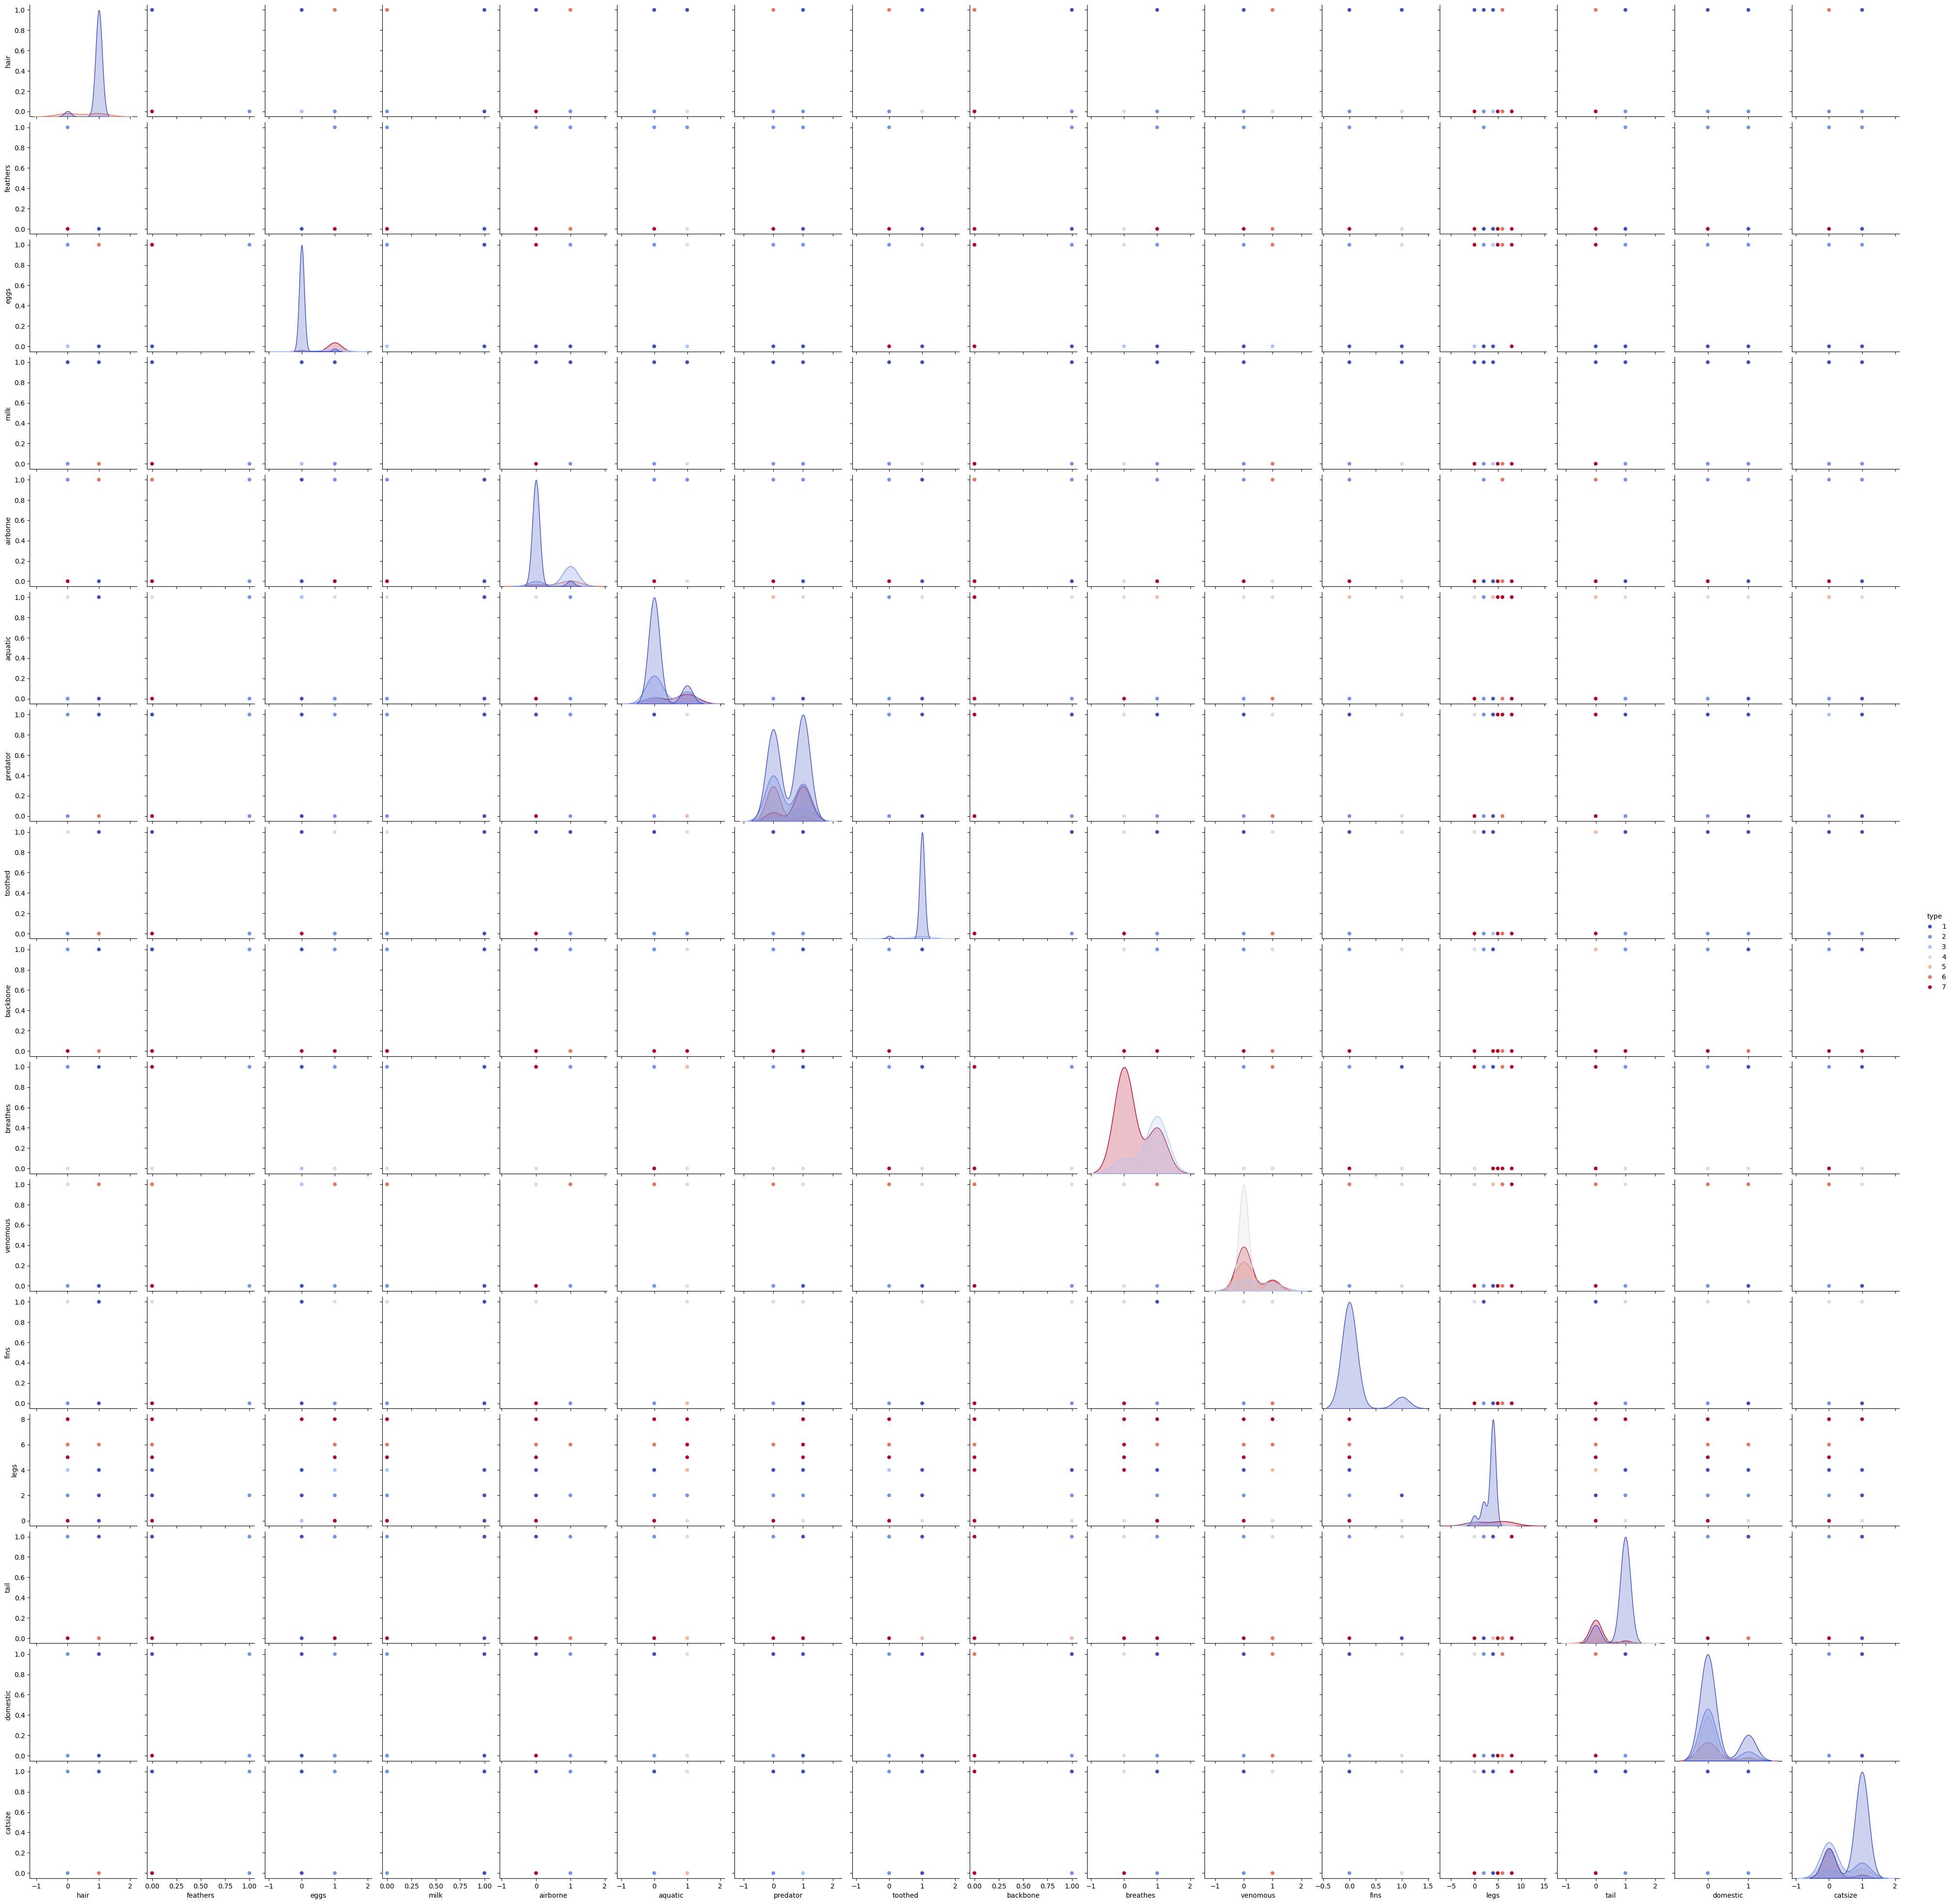

In [33]:
#Visualization
sns.pairplot(data, hue='type', palette='coolwarm')
plt.show()

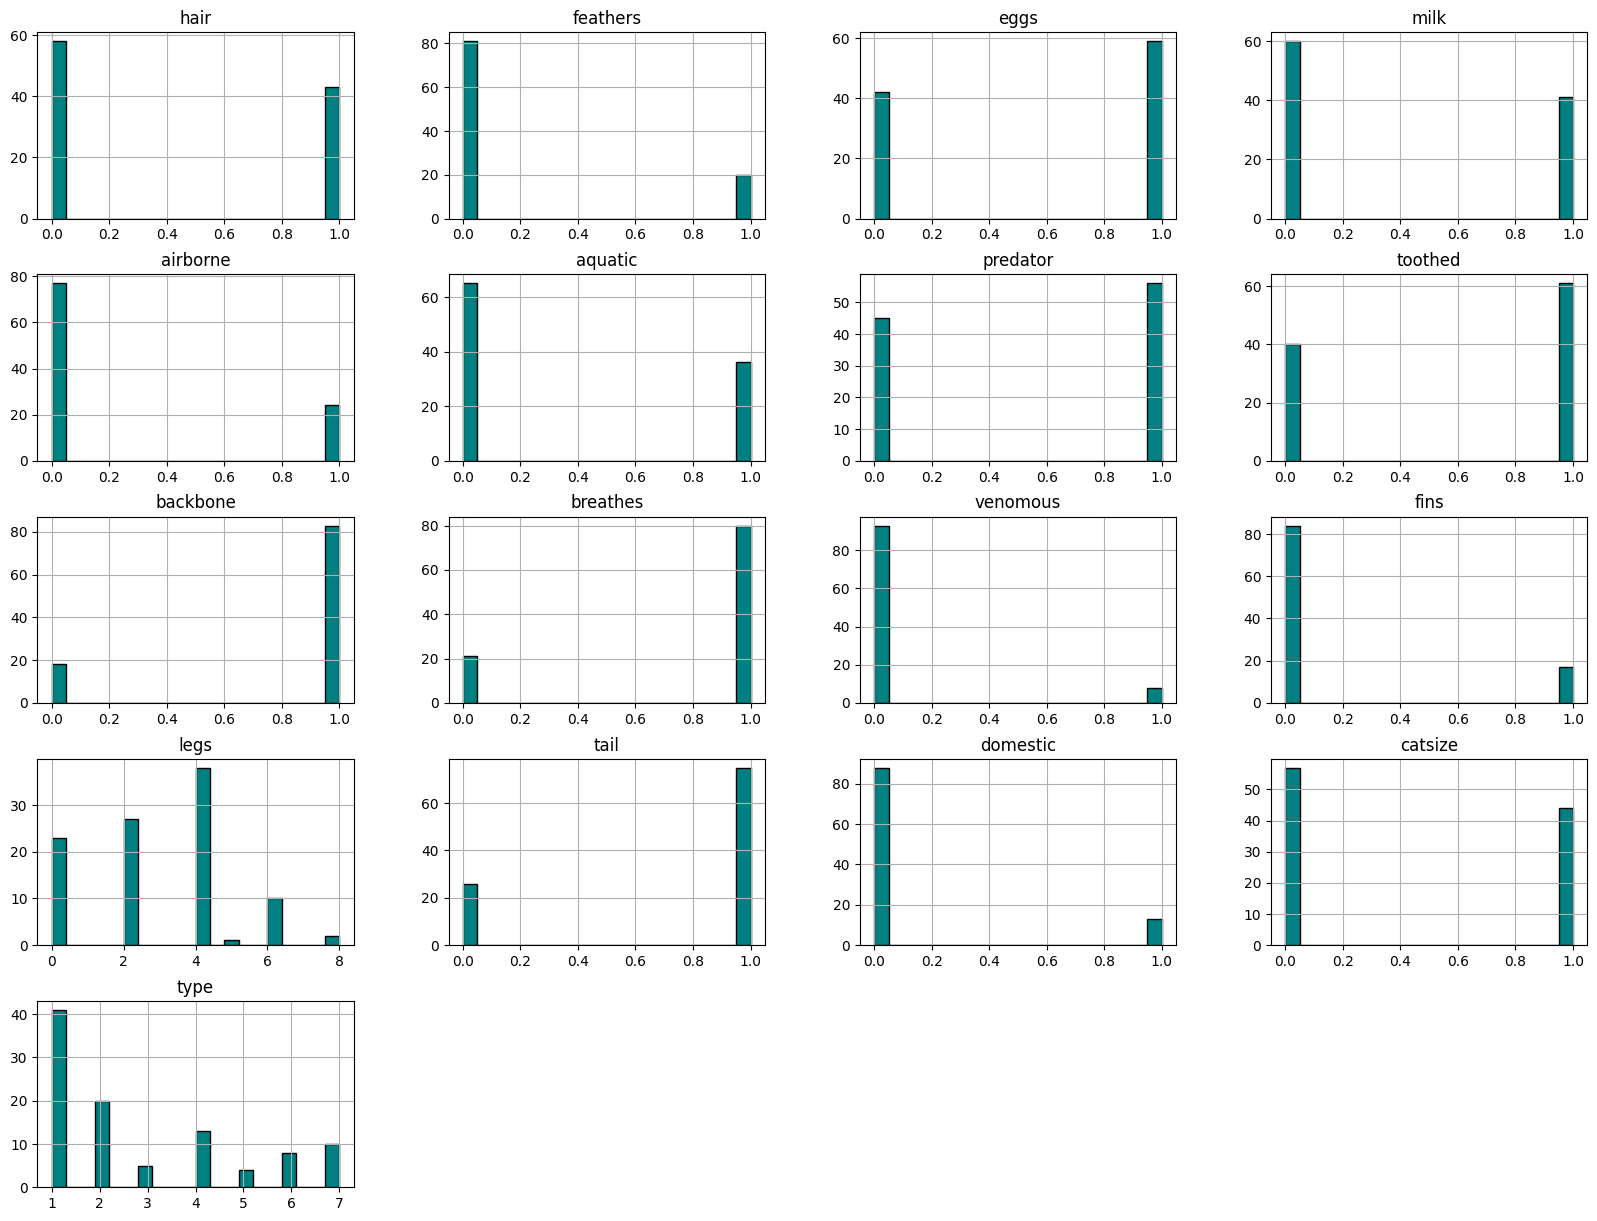

In [31]:
data.hist(bins=20, figsize=(20, 15), color='teal', edgecolor='black')
plt.show()

In [5]:
#checking missing values
print(data.isnull().sum())

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [9]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
features=data.drop(['type','animal name'], axis=1)
scaler=StandardScaler()
features_scaled=scaler.fit_transform(features)
target=data['type']


In [12]:
#Creating data frame
data_scaled=pd.DataFrame(features_scaled, columns=features.columns)
data_scaled['type'] = data['type']
print(data_scaled.head())

       hair  feathers      eggs      milk  airborne   aquatic  predator  \
0  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208  0.896421   
1  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208 -1.115547   
2 -0.861034 -0.496904  0.843721 -0.826640 -0.558291  1.343710  0.896421   
3  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208  0.896421   
4  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208  0.896421   

    toothed  backbone  breathes  venomous      fins      legs      tail  \
0  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540 -1.698416   
1  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540  0.588784   
2  0.809776   0.46569 -1.951800 -0.293294  2.222876 -1.404435  0.588784   
3  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540 -1.698416   
4  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540  0.588784   

   domestic   catsize  type  
0 -0.384353  1.138180     1  
1 -0.384353  1.138180     1  
2 -0.384

In [14]:
# Split the Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_scaled, data['type'], test_size=0.2, random_state=42)
print(f'Training set size: {x_train.shape[0]}')
print(f'Testing set size: {x_test.shape[0]}')

Training set size: 80
Testing set size: 21


In [17]:
# Implement KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)


In [18]:
knn

KNeighborsClassifier(metric='euclidean')

In [20]:
#Evaluate the Classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.9523809523809523
Precision: 0.9206349206349207
Recall: 0.9523809523809523
F1-score: 0.9333333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# Visualize Decision Boundaries
from sklearn.decomposition import PCA

In [22]:
# Reduce to 2D using PCA
pca = PCA(n_components=2)
x_train_2D = pca.fit_transform(x_train)
x_test_2D = pca.transform(x_test)
knn_2D = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_2D.fit(x_train_2D, y_train)

KNeighborsClassifier(metric='euclidean')

In [24]:
from re import X
# Define the mesh grid
x_min, x_max = x_train_2D[:, 0].min() - 1, x_train_2D[:, 0].max() + 1
y_min, y_max = x_train_2D[:, 1].min() - 1, x_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

In [26]:
xx, yy

(array([[-3.5014276, -3.4014276, -3.3014276, ...,  4.0985724,  4.1985724,
          4.2985724],
        [-3.5014276, -3.4014276, -3.3014276, ...,  4.0985724,  4.1985724,
          4.2985724],
        [-3.5014276, -3.4014276, -3.3014276, ...,  4.0985724,  4.1985724,
          4.2985724],
        ...,
        [-3.5014276, -3.4014276, -3.3014276, ...,  4.0985724,  4.1985724,
          4.2985724],
        [-3.5014276, -3.4014276, -3.3014276, ...,  4.0985724,  4.1985724,
          4.2985724],
        [-3.5014276, -3.4014276, -3.3014276, ...,  4.0985724,  4.1985724,
          4.2985724]]),
 array([[-3.70967751, -3.70967751, -3.70967751, ..., -3.70967751,
         -3.70967751, -3.70967751],
        [-3.60967751, -3.60967751, -3.60967751, ..., -3.60967751,
         -3.60967751, -3.60967751],
        [-3.50967751, -3.50967751, -3.50967751, ..., -3.50967751,
         -3.50967751, -3.50967751],
        ...,
        [ 4.79032249,  4.79032249,  4.79032249, ...,  4.79032249,
          4.79032249,  4

In [27]:
# Predict on the mesh grid
Z = knn_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [28]:
Z

array([[2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       ...,
       [4, 4, 4, ..., 1, 1, 1],
       [4, 4, 4, ..., 1, 1, 1],
       [4, 4, 4, ..., 1, 1, 1]])

<ipython-input-34-668a143b2f93>:4: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test_2D[:, 0], x_test_2D[:, 1], c=y_test, marker='x', edgecolor='k', s=100, cmap='coolwarm', label='Test')


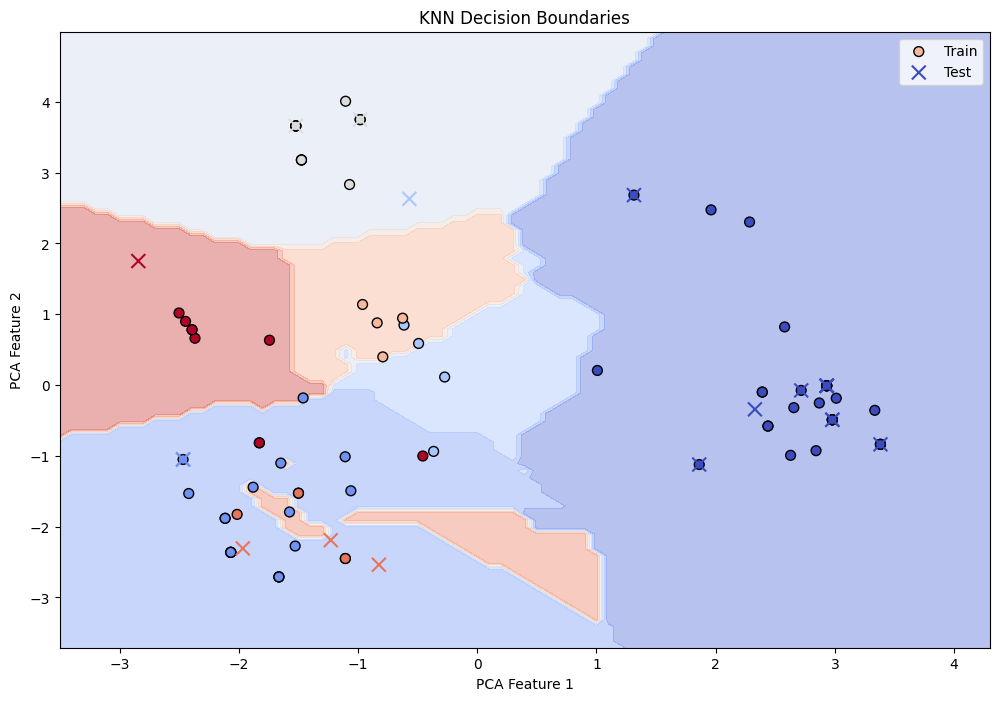

In [34]:
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(x_train_2D[:, 0], x_train_2D[:, 1], c=y_train, marker='o', edgecolor='k', s=50, cmap='coolwarm', label='Train')
plt.scatter(x_test_2D[:, 0], x_test_2D[:, 1], c=y_test, marker='x', edgecolor='k', s=100, cmap='coolwarm', label='Test')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('KNN Decision Boundaries')
plt.legend()
plt.show()

In [ ]:
'''
1. What are the key hyperparameters in KNN?
*K: The number of nearest neighbors to consider.
*Distance Metric: The method used to calculate the distance between data points. Common types are:
  Euclidean: Straight-line distance.
  Manhattan: Sum of absolute differences.
   Minkowski: A generalization of Euclidean and Manhattan distances.
*Weighting Function: Determines the influence of neighbors.
  Uniform: All neighbors have equal influence.
  Distance: Closer neighbors have more influence.

'''

In [ ]:
'''
2.What distance metrics can be used in KNN?
Chebyshev distance: D(x,y) = max(|xi - yi|)
Euclidean distance: D(x,y) = sqrt(sum((xi - yi)^2))
Hamming distance: D(x,y) = sum(xi != yi)
Mahalanobis distance: D(x,y) = sqrt((x - y) * S^-1 * (x - y))
Manhattan distance: D(x,y) = sum(|xi - yi|)
Minkowski distance: D(x,y) = (sum(|xi - yi|^p))^(1/p)
'''